Background: Dogecoin is a memecoin because it was created as a joke but has attracted a lot of attention when it ranked top 10 with ~33B USD market cap

Context: In Dogecoin's perspective, how does Elon Musk tweeting about Dogecoin influence the Google search engagement and crypto market value

Hypotheses

1. Elon Musk tweeting about Dogecoin heavily impacts the cryto price
    - Analyze the reaction of Dogecoin price 10 mins after Elon Musk tweeted about it >> not significant
    - extend to 6 hrs becomes significant
2. Elon Musk tweeting about Dogecoin heavily impacts the Google search trends
    - Alanlyze possible delayed effect of Elon Musk's tweet on Dogecoin' Google search trends
    - 4 day lag shows significance

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime,timedelta
import statsmodels.api as sm



## Get Twitter Data from Twitter
Because Twitter API has some limitations, we need to crawl the tweets.


In [2]:
# # We encapsulate the TwitterScaper class to get the tweets and save the data to 'data/dogecoin_tweets.csv'
# from utils import TwitterScaper 
# print('Starting Scrape...')
# ts = TwitterScaper(headless=False)
# to_parse = ts.scrape_tweets()
# scraped_data = ts.parse_tweets(to_parse)
# print('Scrape Success!')
# scraped_data.to_csv('data/dogecoin_tweets.csv', index=False)


## Get Dogecoin price data from ccxt

In [39]:
# We encapsulate the TwitterScaper class to get the price data and save the data to 'data/dogecoin_price.csv'
from utils import PriceGetter
duration = 6 #hours
interval  = 1 # minute
price = PriceGetter(timeframe=f"{interval}m")
date = pd.read_csv("./data/doge_tweets.csv")["timestamp"]
for ind,d in enumerate(date):
    if 4<=parser.parse(d).month<=10:
        timestamp = int(parser.parse(d).timestamp()-3600*(duration-1)) * 1000 # daylight saving time is one hour earlier than winter time
    else:
        timestamp = int(parser.parse(d).timestamp() - 3600*duration) * 1000
    price.update_price(since=timestamp, limit=int(duration*120/interval))
    print(f"Finished {ind+1} of {len(date)}")
price.rename_col()
price.drop_duplicates()
price.rank_data()
price.save_price(f"price_clean_{duration}h.csv")


Finished 1 of 26
Finished 2 of 26
Finished 3 of 26
Finished 4 of 26
Finished 5 of 26
Finished 6 of 26
Finished 7 of 26
Finished 8 of 26
Finished 9 of 26
Finished 10 of 26
Finished 11 of 26
Finished 12 of 26
Finished 13 of 26
Finished 14 of 26
Finished 15 of 26
Finished 16 of 26
Finished 17 of 26
Finished 18 of 26
Finished 19 of 26
Finished 20 of 26
Finished 21 of 26
Finished 22 of 26
Finished 23 of 26
Finished 24 of 26
Finished 25 of 26
Finished 26 of 26


## Preprocess data


In [60]:
# merge the price and tweets data
tweets_df = pd.read_csv('data/dogecoin_tweets.csv')
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])#.apply(lambda x:datetime.strftime(x,'%Y-%m-%d %H:00:00'))

dogecoin_price_df = pd.read_csv(f'data/price_clean_{duration}h.csv')

dogecoin_price_df['timestamp'] = pd.to_datetime(dogecoin_price_df['timestamp'], unit='ms')#.apply(lambda x:datetime.strftime(x,'%Y-%m-%d %H:00:00'))
dogecoin_price_df.sort_values(by='timestamp', inplace=True)
merge_df = pd.merge(left=dogecoin_price_df, right=tweets_df, how='left', on='timestamp')
merge_df.head()

,timestamp,open,high,low,close,volume,tweet_content,retweet_count,quote_count,like_count
0,2020-12-20 03:30:00,0.003900,0.003903,0.003900,0.003901,789167.0,NaN,NaN,NaN,NaN
1,2020-12-20 03:31:00,0.003904,0.003906,0.003900,0.003904,337098.0,NaN,NaN,NaN,NaN
2,2020-12-20 03:32:00,0.003900,0.003907,0.003900,0.003906,287859.0,NaN,NaN,NaN,NaN
3,2020-12-20 03:33:00,0.003906,0.003918,0.003898,0.003908,13128605.0,NaN,NaN,NaN,NaN
4,2020-12-20 03:34:00,0.003908,0.003908,0.003908,0.003908,0.0,NaN,NaN,NaN,NaN


In [61]:
# select the tweet_content col that is not null
twitter_index = merge_df[merge_df['tweet_content'].notnull()].index
# Create a new column called tweet, if it is the time that Musk tweeted, that row will be the True
merge_df.loc[twitter_index, 'tweet'] =True 
# Calculate the change in price
merge_df['price_change'] = (merge_df['close']-merge_df['open'])/merge_df['open']
merge_df['max_price_change'] = merge_df['high']-merge_df['low']
merge_df.head()

,timestamp,open,high,low,close,volume,tweet_content,retweet_count,quote_count,like_count,tweet,price_change,max_price_change
0,2020-12-20 03:30:00,0.003900,0.003903,0.003900,0.003901,789167.0,NaN,NaN,NaN,NaN,NaN,0.000231,0.000003
1,2020-12-20 03:31:00,0.003904,0.003906,0.003900,0.003904,337098.0,NaN,NaN,NaN,NaN,NaN,0.000026,0.000006
2,2020-12-20 03:32:00,0.003900,0.003907,0.003900,0.003906,287859.0,NaN,NaN,NaN,NaN,NaN,0.001436,0.000007
3,2020-12-20 03:33:00,0.003906,0.003918,0.003898,0.003908,13128605.0,NaN,NaN,NaN,NaN,NaN,0.000512,0.000020
4,2020-12-20 03:34:00,0.003908,0.003908,0.003908,0.003908,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


In [63]:
# Because we only get the price data 6h before and after Musk's tweet, there are some price data gap, we need to find them
# Identify the timestamp with gaps

timestamp_gap_index = []
timestamp_col = merge_df["timestamp"]
for i, timestamp in enumerate(timestamp_col):
    if (i!=0) and abs(parser.parse(str(timestamp))-parser.parse(str(timestamp_col[i-1])))>timedelta(hours=1): # in case of missing data price data
            timestamp_gap_index.append(i)
# If it's the time gap, that row will be the True
merge_df.loc[timestamp_gap_index,'time_gap']=True
# Fill the gap with nan
merge_df.loc[timestamp_gap_index,["price_change"]]=np.nan
merge_df.head()

,timestamp,open,high,low,close,volume,tweet_content,retweet_count,quote_count,like_count,tweet,price_change,max_price_change,time_gap
0,2020-12-20 03:30:00,0.003900,0.003903,0.003900,0.003901,789167.0,NaN,NaN,NaN,NaN,NaN,0.000231,0.000003,NaN
1,2020-12-20 03:31:00,0.003904,0.003906,0.003900,0.003904,337098.0,NaN,NaN,NaN,NaN,NaN,0.000026,0.000006,NaN
2,2020-12-20 03:32:00,0.003900,0.003907,0.003900,0.003906,287859.0,NaN,NaN,NaN,NaN,NaN,0.001436,0.000007,NaN
3,2020-12-20 03:33:00,0.003906,0.003918,0.003898,0.003908,13128605.0,NaN,NaN,NaN,NaN,NaN,0.000512,0.000020,NaN
4,2020-12-20 03:34:00,0.003908,0.003908,0.003908,0.003908,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


## Analyze the data


### Part I:
Analyze whether the price change, trading volume and volatility of the price change of the duration of dogecoin would be influenced by whether Must tweeted about dogecoin or not

In [64]:
# Because we want to analyze the crypto market performance before and after Musk's tweet, we need to identify the time before and after Musk's tweet
# Then, we respectively split price change data, volume data and volatility into two lists, and see whether there is a significant difference between them
price_change_before_twitter_list = []
price_change_after_twitter_list = []
volume_before_twitter_list = []
volume_after_twitter_list = []
volatility_before_twitter_list = []
volatility_after_twitter_list = []
max_price_change_before_twitter_list = []
max_price_change_after_twitter_list = []
for count,index in enumerate(timestamp_gap_index):
    if count!=0:
        dfm_temp = merge_df.loc[timestamp_gap_index[count-1]:index-1]
    else:
        dfm_temp = merge_df.loc[0:index-1]
    # Analysis
    # Find the first tweet index 
    first_tweet_index = dfm_temp[dfm_temp['tweet']==True].index[0]
    # Find the last tweet index
    last_tweet_index = dfm_temp[dfm_temp['tweet']==True].index[-1]

    # Find the first price change before the first tweet
    price_change_before_twitter = list(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['price_change'])
    price_change_before_twitter_list.extend(price_change_before_twitter)
    # Find the last price change after the last tweet
    price_change_after_twitter = list(dfm_temp.loc[last_tweet_index:]['price_change'])
    price_change_after_twitter_list.extend(price_change_after_twitter)

    # Find the first volume before the first tweet
    volume_before_twitter_list.extend(list(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['volume']))
    # Find the last volume after the last tweet
    volume_after_twitter_list.extend(list(dfm_temp.loc[last_tweet_index:]['volume']))

    # Find the first volatility before the first tweet
    volatility_before_twitter_list.append(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['price_change'].std())
    # Find the last volatility after the last tweet
    volatility_after_twitter_list.append(dfm_temp.loc[last_tweet_index:]['price_change'].std()) 
    
    # Find the max price change before the first tweet
    max_price_change_before_twitter_list.extend(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['max_price_change'])
    # Find the max price change after the last tweet
    max_price_change_after_twitter_list.extend(dfm_temp.loc[last_tweet_index:]['max_price_change'])
    

IndexError: index 0 is out of bounds for axis 0 with size 0

In [44]:
merge_df

,timestamp,open,high,low,close,volume,tweet_content,retweet_count,quote_count,like_count,tweet,price_change,max_price_change,time_gap
0,2020-12-20 03:30:00,0.003900,0.003903,0.003900,0.003901,789167.0,NaN,NaN,NaN,NaN,NaN,0.000231,0.000003,NaN
1,2020-12-20 03:31:00,0.003904,0.003906,0.003900,0.003904,337098.0,NaN,NaN,NaN,NaN,NaN,0.000026,0.000006,NaN
2,2020-12-20 03:32:00,0.003900,0.003907,0.003900,0.003906,287859.0,NaN,NaN,NaN,NaN,NaN,0.001436,0.000007,NaN
3,2020-12-20 03:33:00,0.003906,0.003918,0.003898,0.003908,13128605.0,NaN,NaN,NaN,NaN,NaN,0.000512,0.000020,NaN
4,2020-12-20 03:34:00,0.003908,0.003908,0.003908,0.003908,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14370,2021-11-01 01:15:00,0.280400,0.280400,0.279300,0.279500,1944303.0,NaN,NaN,NaN,NaN,NaN,-0.003210,0.001100,NaN
14371,2021-11-01 01:16:00,0.279500,0.279800,0.279500,0.279600,860478.0,NaN,NaN,NaN,NaN,NaN,0.000358,0.000300,NaN
14372,2021-11-01 01:17:00,0.279600,0.279900,0.279300,0.279500,1509914.0,NaN,NaN,NaN,NaN,NaN,-0.000358,0.000600,NaN
14373,2021-11-01 01:18:00,0.279500,0.279800,0.279100,0.279300,1198236.0,NaN,NaN,NaN,NaN,NaN,-0.000716,0.000700,NaN


/tmp/ipykernel_46880/499255652.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['','before','after',''])
/tmp/ipykernel_46880/499255652.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['','before','after',''])
/tmp/ipykernel_46880/499255652.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['','before','after',''])
/tmp/ipykernel_46880/499255652.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(['','before','after',''])


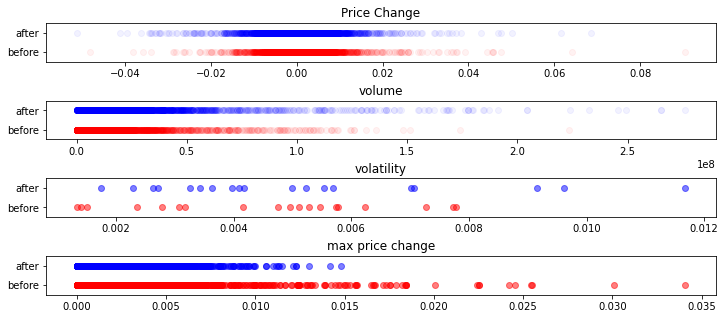

In [45]:
# Draw the scatter plot to see the difference
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

# draw the scatter plot of price change
ax1.set_title('Price Change')
ax1.set_ylim(-0.5,1.5,1)
ax1.set_yticklabels(['','before','after',''])
ax1.scatter(price_change_before_twitter_list, [0]*len(price_change_before_twitter_list), marker='o', color='r', alpha=0.05)
ax1.scatter(price_change_after_twitter_list, [1]*len(price_change_after_twitter_list), marker='o', color='b', alpha=0.05)

ax2.set_title('volume')
ax2.set_ylim(-0.5,1.5,1)
ax2.set_yticklabels(['','before','after',''])
ax2.scatter(volume_before_twitter_list, [0]*len(volume_before_twitter_list), marker='o', color='r', alpha=0.05)
ax2.scatter(volume_after_twitter_list, [1]*len(volume_after_twitter_list), marker='o', color='b', alpha=0.05)

ax3.set_title('volatility')
ax3.set_ylim(-0.5,1.5,1)
ax3.set_yticklabels(['','before','after',''])
ax3.scatter(volatility_before_twitter_list, [0]*len(volatility_before_twitter_list), marker='o', color='r', alpha=0.5)
ax3.scatter(volatility_after_twitter_list, [1]*len(volatility_after_twitter_list), marker='o', color='b', alpha=0.5)

ax4.set_title('max price change')
ax4.set_ylim(-0.5,1.5,1)
ax4.set_yticklabels(['','before','after',''])
ax4.scatter(max_price_change_before_twitter_list, [0]*len(max_price_change_before_twitter_list), marker='o', color='r', alpha=0.5)
ax4.scatter(max_price_change_after_twitter_list, [1]*len(max_price_change_after_twitter_list), marker='o', color='b', alpha=0.5)

# plt.yticks([0,1],['before','after'])
plt.subplots_adjust(hspace=1)
plt.show()

In [46]:
max_price_change_before_twitter_list 

[3.100000000000238e-06,
 5.699999999999976e-06,
 7.199999999999741e-06,
 2.0399999999999845e-05,
 0.0,
 7.599999999999968e-06,
 7.499999999999694e-06,
 3.999999999997929e-07,
 0.0,
 5.799999999999816e-06,
 8.50000000000026e-06,
 1.029999999999998e-05,
 4.2000000000002105e-06,
 4.099999999999937e-06,
 0.0,
 0.0,
 9.5999999999998e-06,
 9.99999999998398e-08,
 1.1999999999998123e-06,
 3.799999999999984e-06,
 2.0000000000011328e-07,
 5.10000000000007e-06,
 5.499999999999863e-06,
 6.200000000000042e-06,
 1.9999999999998318e-06,
 0.0,
 0.0,
 3.9000000000002574e-06,
 2.4000000000000583e-06,
 8.6000000000001e-06,
 9.49999999999996e-06,
 6.899999999999788e-06,
 1.299999999999999e-05,
 7.599999999999968e-06,
 4.800000000000117e-06,
 1.299999999999999e-05,
 7.800000000000081e-06,
 1.6000000000000389e-06,
 0.0,
 4.999999999999796e-06,
 9.99999999998398e-08,
 0.0,
 2.7000000000000114e-06,
 1.4099999999999963e-05,
 1.8699999999999967e-05,
 1.680000000000041e-05,
 8.399999999999987e-06,
 7.19999999999

### Hypothesis 1
The price change before and after the first tweet is significantly different

([<matplotlib.axis.XTick at 0x7f20c84ab130>,
 [Text(1, 0, 'before'), Text(2, 0, 'after')])

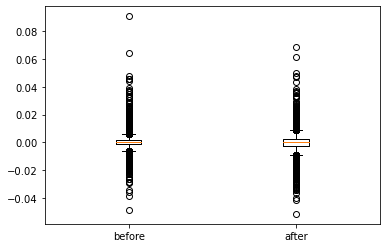

In [47]:
## Draw the picture of price change
# dropna
price_change_before_twitter_list = np.array(price_change_before_twitter_list)
price_change_before_twitter_list = price_change_before_twitter_list[~np.isnan(price_change_before_twitter_list)].tolist()
price_change_after_twitter_list = np.array(price_change_after_twitter_list)
price_change_after_twitter_list = price_change_after_twitter_list[~np.isnan(price_change_after_twitter_list)].tolist()
# draw the boxplot
plt.boxplot([price_change_before_twitter_list,price_change_after_twitter_list])
# rename the xtick
plt.xticks([1,2],['before','after'])

In [48]:
## Do the test
X =np.array([0]*len(price_change_before_twitter_list)+[1]*len(price_change_after_twitter_list)).astype("int")
Y = np.array(price_change_before_twitter_list+price_change_after_twitter_list).astype('float64')
dfm_price_change = pd.DataFrame({'X':X, 'Y':Y})
dfm_price_change.dropna(inplace=True)
X = dfm_price_change["X"]
Y = dfm_price_change["Y"]
# print(X,Y)
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.608
Date:                Sun, 14 Nov 2021   Prob (F-statistic):             0.0179
Time:                        17:46:07   Log-Likelihood:                 51354.
No. Observations:               13512   AIC:                        -1.027e+05
Df Residuals:                   13510   BIC:                        -1.027e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   6.62e-05      3.303      0.0

([<matplotlib.axis.XTick at 0x7f20c83be7f0>,
 [Text(1, 0, 'before'), Text(2, 0, 'after')])

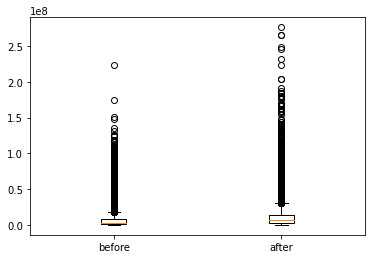

In [49]:
# Draw the picture of volume
# dropna
volume_before_twitter_list = np.array(volume_before_twitter_list)
volume_before_twitter_list = volume_before_twitter_list[~np.isnan(volume_before_twitter_list)].tolist()
volume_after_twitter_list = np.array(volume_after_twitter_list)
volume_after_twitter_list = volume_after_twitter_list[~np.isnan(volume_after_twitter_list)].tolist()
# draw the boxplot
plt.boxplot([volume_before_twitter_list,volume_after_twitter_list])
# rename the xtick
plt.xticks([1,2],['before','after'])


In [50]:
## Do the test
X =np.array([0]*len(volume_before_twitter_list)+[1]*len(volume_after_twitter_list)).astype("int")
Y = np.array(volume_before_twitter_list+volume_after_twitter_list).astype('float64')
dfm_volume = pd.DataFrame({'X':X, 'Y':Y})
dfm_volume.dropna(inplace=True)
X = dfm_volume["X"]
Y = dfm_volume["Y"]
# print(X,Y)
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     235.9
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           8.64e-53
Time:                        17:46:07   Log-Likelihood:            -2.4605e+05
No. Observations:               13530   AIC:                         4.921e+05
Df Residuals:                   13528   BIC:                         4.921e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.479e+06   2.34e+05     36.264      0.0

([<matplotlib.axis.XTick at 0x7f20c83b4130>,
 [Text(1, 0, 'before'), Text(2, 0, 'after')])

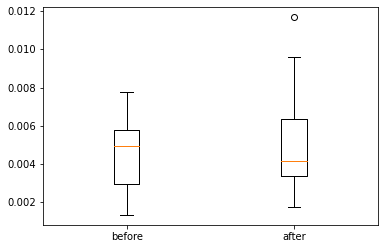

In [51]:
# Draw the picture of volatility
# dropna
volatility_before_twitter_list = np.array(volatility_before_twitter_list)
volatility_before_twitter_list = volatility_before_twitter_list[~np.isnan(volatility_before_twitter_list)].tolist()
volatility_after_twitter_list = np.array(volatility_after_twitter_list)
volatility_after_twitter_list = volatility_after_twitter_list[~np.isnan(volatility_after_twitter_list)].tolist()
# draw the boxplot
plt.boxplot([volatility_before_twitter_list,volatility_after_twitter_list])
# rename the xtick
plt.xticks([1,2],['before','after'])


In [52]:
## Do the test
X =np.array([0]*len(volatility_before_twitter_list)+[1]*len(volatility_after_twitter_list)).astype("int")
Y = np.array(volatility_before_twitter_list+volatility_after_twitter_list).astype('float64')
dfm_volatility = pd.DataFrame({'X':X, 'Y':Y})
dfm_volatility.dropna(inplace=True)
X = dfm_volatility["X"]
Y = dfm_volatility["Y"]
# print(X,Y)
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6582
Date:                Sun, 14 Nov 2021   Prob (F-statistic):              0.423
Time:                        17:46:08   Log-Likelihood:                 176.31
No. Observations:                  38   AIC:                            -348.6
Df Residuals:                      36   BIC:                            -345.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.001      8.208      0.0